<h1 style="font-size: 40px; margin-bottom: 0px;">2.1 Statistical Analysis in Python (I)</h1>

<p style="margin-top: 15px;"><strong>And more plotting</strong></p>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Today, we'll continue working with the data that we've collected from MCB201A as well as generating some hypothetical datasets to practice working in Python and running statistical analyses. Since today's lesson involves a lot of the skills you know, today will lean more towards independent exercises, since the concepts should be familiar to you from your own prior research experience and MCB201A. Now it is just translating that knowledge into Python code and understanding how our Python interpreter is seeing our data. At set points, we'll reconvene and see where everyone is at and also proceed with a couple of guided demonstrations.

We'll start by analyzing our class MTT data that we've generated a nice swarmplot for. We will first pull out some descriptive statistics from our data and run a quick two-tailed t-test to evaluate if TAZ KO significantly impairs our MDA-MB-231 cells' ability to proliferate. Then, we will update our swarmplot with the results of our analysis and export our finished publication quality figure. You will practice setting up a function to use in subsequent analyses, and you will also learn a couple of ways to begin compacting your code.

<strong>Learning objectives:</strong>
<ul>
    <li>Continue to practice using and defining functions</li>
    <li>Learn methods to calculate descriptive statistics</li>
    <li>Perform pair-wise comparisons between datasets</li>
    <li>Learn more complex assignment operations</li>
    <li>Learn list and dictionary comprehension to compact code</li>
    <li>Additional plotting practice</li>
</ul>

<h2>Import Packages</h2>

<ul>
    <li><code>numpy</code></li>
    <li><code>pandas</code></li>
    <li><code>matplotlib.pyplot</code></li>
    <li><code>seaborn</code> - to fine tune visualizations</li>
    <li><code>scipy.stats</code> - to perform statistical tests</li>
</ul>

In [3]:
#Import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1 - Analyze class MTT data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

For this exercise, you'll be analyzing your MTT data, running through a few descriptive statistics then performing a statistical analysis of the data. Once everyone has completed their analysis, we'll proceed with a guided plotting demonsration.

<h2>Import <code>class_mtt_data.csv</code> from <code>../Week_1/data</code></h2>

Go ahead and first import our class MTT data. You can use the same .csv file that we used last week, so you'll need to specify the file path when importing the file.

In [4]:
mtt_data = pd.read_csv('/home/jovyan/MCB201B_F2025/Week_1/data/class_mtt_data.csv')

Then do a quick sanity check to see if it imported correctly.

In [5]:
mtt_data.style

,control,tazko
0,0.852458,0.504785
1,0.819008,0.854697
2,1.389640,0.723924
3,0.983758,0.392318
4,1.102809,0.694030
5,0.852327,0.497278


<h2>Calculate the mean relative corrected absorbance of control and TAZ KO</h2>

Recall that the data that we exported was for the relative corrected absorbances. For this part of exercise #1, use <code>pandas</code> <code>pd.DataFrame.mean()</code> function to calculate the means of both the <code>control</code> and the <code>tazko</code> groups. <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html" rel="noopener noreferrer"><u>Documentation for <code>pd.DataFrame.mean()</code> can be found here.</u></a> 

If you dig into the documentation, you can see that you can provide the function with the full DataFrame, and it will calculate mean of all values along a defined axis (either for rows or columns).

In [9]:
mtt_data.mean()

control    1.000000
tazko      0.611172
dtype: float64

<h2>Calculate the standard deviation and standard error of the mean for both sample groups</h2>

We can similarly use <code>pandas</code> to calculate the standard deviation and standard error of the mean for both groups by supplying it with the full DataFrame. In this case, we'll use the <code>pd.DataFrame.std()</code> and <code>pd.DataFrame.sem()</code> functions. <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html" rel="noopener noreferrer"><u>Documentation for <code>pd.DataFrame.std()</code> can be found here.</u></a> <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sem.html" rel="noopener noreferrer"><u>Documentation for <code>pd.DataFrame.sem()</code> can be found here.</u></a>

In [12]:
mtt_data.std(axis=0)

control    0.218626
tazko      0.173822
dtype: float64

In [13]:
mtt_data.sem()

control    0.089254
tazko      0.070962
dtype: float64

<h2>Perform a two-tailed t-test</h2>

We've taken a look at our class MTT data's descriptive statistics, and to determine if there's a significant difference in the means of our two groups, we'll make use of <code>scipy.stats</code>. This package contains a lot of important functions that allow us to perform the statistical tests that we'll often encounter in biomedical research. The one we're all familiar with is the two-tailed t-test that compares the means of two groups.

The function in <code>scipy.stats</code> that allows us to perform a two-tailed t-test is the <code>stats.ttest_ind()</code> function. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" rel="noopener noreferrer"><u>Documentation for <code>stats.ttest_ind()</code> can be found here</u></a>.


If we dig into the documentation to see what the function requires from us in order to perform its defined operation:

```
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
```

We can see that the parameters that you'll need to keep in mind are:
<ul>
    <li><code>a</code> - list or array-like object of your first group of samples. In our case, we can have this be our <code>'control'</code> samples' data.</li>
    <li><code>b</code> - list or array-like object of your second group of samples. This can be our <code>'tazko'</code> samples' data.</li>
    <li><code>axis</code> - specifies axis to perform the test. Our dataset is fairly simple, so we can leave this as the default value.</li>
    <li><code>equal_var</code> - tells Python if you want it to assume equal variance or not. If not assuming equal variance, then it will perform a Welch's t-test</li>
    <li><code>nan_policy</code> - tells Python what to do if it encounters an <code>NaN</code>. Can specify <code>'propagate'</code> to propagate the <code>NaN</code> to the output or <code>'omit'</code> to ignore it in the calculations or <code>'raise'</code> to raise an error when <code>NaN</code> is encountered</li>
</ul>

There's a single output to this function, but keep in mind that this single output has multiple attributes. So you can actually have Python output either the full result or specific attributes of the result of the t-test.
<ul>
    <li><code>result</code> - this is the output. You'll want to save your output to a variable, so you can call up the attributes</li>
    <ul>
        <li><code>statistic</code> - t-statistic used to calculate the p-value. This is an attribute of the result</li>
        <li><code>pvalue</code> - the p-value. This is a second attribute of the result</li>
    </ul>
</ul>

So if you want to find the resulting p-value of your statistical analysis, you can either tell Python to directly pull the <code>pvalue</code> attribute when it does the test. Or you can save the result of the test to a variable, and then have Python output the <code>pvalue</code> attribute.

```
conclusion = stat.ttest_ind(a, b)
print(conclusion.pvalue)
```

In [14]:
conclusion = stats.ttest_ind(mtt_data['control'],
                             mtt_data['tazko'],
                             axis=0,
                             equal_var=False,
                             nan_policy='propagate'
                            )

print(conclusion.pvalue)

0.007147461181692579


<h2>Set up if-else statement to output whether or not there is a significant difference</h2>

For this part of the exercise, see if you can use an if-else statement to have Python output a conclusion based on the results of your two-tailed t-test.

In [15]:
if conclusion.pvalue > 0.01:
    print('insignificant')
else:
    print('statistically significant')

statistically significant


<h2>What if you wanted to output a specific statement regarding whether the difference is a significant increase or decrease?</h2>

How can we then set up our if-else statement to differentiate between whether there is a significant increase or decrease in our MTT data?

In [21]:
mtt_data.mean()['control']

np.float64(0.9999999999999999)

In [19]:
if conclusion.pvalue < 0.01:
    if mtt_data.mean()['control'] > mtt_data.mean()['tazko']:
        print('significant decrease')
    else:
        print('significant increase')
else:
    print('not significant')

significant decrease


In [24]:
ctrl_mtt = mtt_data.mean()['control']
tazko_mtt = mtt_data.mean()['tazko']

if conclusion.pvalue < 0.01:
    difference = 'increase' if ctrl_mtt < tazko_mtt else 'decrease'
    print(f'There is a significant {difference} in proliferation when we KO TAZ (p={conclusion.pvalue:.4f})')
else:
    print(f'There is no significant difference (p={conclusion.pvalue:.4f})')

There is a significant decrease in proliferation when we KO TAZ (p=0.0071)


We can reconvene here and once everyone is on the same page, we can proceed with annotating a swarmplot of our class MTT data.

<h1 style="font-size: 40px; margin-bottom: 0px;">Annotate swarmplot with analysis results</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 750px;"></hr>

Copied below is our swarmplot code, where we layered multiple plots together to generate a swarmplot containing our individual replicates. Now that we have the results of our statistical analysis, we can provide that information in our plot as well, so that the reader knows that a statistical test was performed and what the results of that statistical test was. To do this, we'll overlay lines and text over our swarmplot.

<h2>Plot a bracket using <code>plt.plot()</code></h2>

Recall from before that we can generate line plots using <code>plt.plot()</code>, and we can make use of this function to plot a line that forms our bracket to indicate to the reader which two groups are being compared.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" rel="noopener noreferrer"><u>Documentation for <code>plt.plot()</code> can be found here.</u></a>

How can we make use of this function first to plot a single line spanning our two groups, and then how can we modify this to form a bracket?

In [33]:
np.max(mtt_data.max())

np.float64(1.389640035118525)

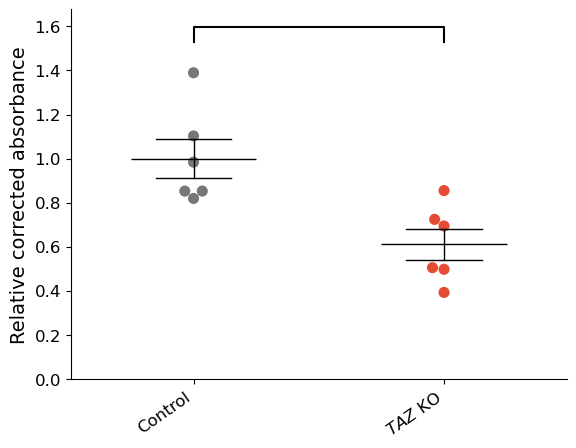

In [41]:
fig, ax = plt.subplots()
dot_colors = ['#777777', '#E64B35']

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

#####################################
x1, x2 = 0, 1
y_max = np.max(mtt_data.max())
adjustment = y_max*1.1
h = y_max*0.05

plt.plot([x1, x1, x2, x2], [adjustment, adjustment + h, adjustment + h, adjustment], color='k')
#####################################

ax.set_ylabel('Relative corrected absorbance',
              size=14
             )

ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=35,
              ha='right',
              size=12
             )
plt.yticks(size=12)

# fig.set_size_inches(3, 4)
# fig.set_dpi(300)

sns.despine()
plt.show()

# fig.savefig('../figures/mtt_data_plot.pdf', bbox_inches='tight')

Now you should see that we have plotted our bracket and adapted our code to be more flexible, so that it is able to adjust accordingly based on the values in our dataset. That way, we don't have to manually go in and replot the brackets if we work with a different dataset.

<h2>Plot text for our annotation using <code>plt.text()</code></h2>

We can also plot text by making use of <code>plt.text()</code>. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html" rel="noopener noreferrer"><u>Documentation for <code>plt.text()</code> can be found here.</u></a>

If we take a look into the documentation:

```
plt.text(x, y, s, fontdict=None, **kwargs)
```

Breaking this down, we can see the following parameters:

<ul>
    <li><code>x</code> - This is our x-axis position for where we want plot our text.</li>
    <li><code>y</code> - This is our y-axis position for where we want to plot our text.</li>
    <li><code>s</code> - This is a string corresponding to the text that we want to plot.</li>
    <li>Along with additional formatting that can be specified through <code>**kwargs</code>, which are additional keyword arguments. Based on the documentation, using <code>fontdict</code> isn't recommended.</li>
</ul>

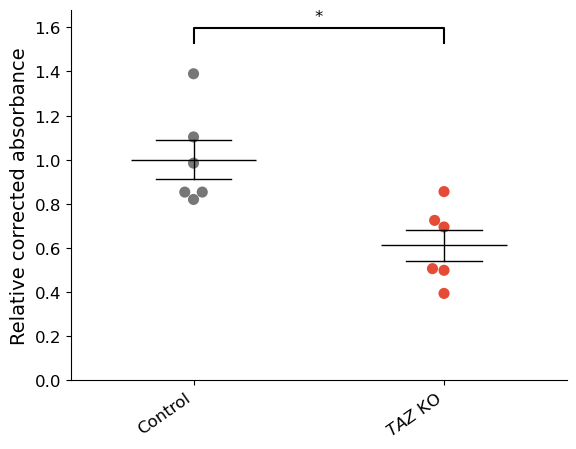

In [46]:
fig, ax = plt.subplots()
dot_colors = ['#777777', '#E64B35']

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

#####################################
x1, x2 = 0, 1
y_max = np.max(mtt_data.max())
adjustment = y_max*1.1
h = y_max*0.05

plt.plot([x1, x1, x2, x2], [adjustment, adjustment + h, adjustment + h, adjustment], color='k')
#####################################

#####################################
if conclusion.pvalue < 0.0001:
    pvalue_star = '***'
elif conclusion.pvalue < 0.001:
    pvalue_star = '**'
elif conclusion.pvalue < 0.01:
    pvalue_star = '*'
else:
    pvalue_star = 'ns'

plt.text((x1+x2)/2 , adjustment+(h*1.25), pvalue_star, ha='center', va='bottom', color='k', size=12)
#####################################

ax.set_ylabel('Relative corrected absorbance',
              size=14
             )

ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=35,
              ha='right',
              size=12
             )
plt.yticks(size=12)

# fig.set_size_inches(3, 4)
# fig.set_dpi(300)

sns.despine()
plt.show()

# fig.savefig('../figures/mtt_data_plot.pdf', bbox_inches='tight')

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2 - Set up a function to generate our plots</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

As you can see, there's a fair amount of lines of code involved in putting together our swarmplot with descriptive statistics overlaid along with the annotations of our statistical analysis. Since we will be using this method of visualizing our data later in this notebook, we can also set up a function that will generate our desired plot.

For this exercise, see if you can put together a function that will set up our swarmplot with the overlaid statistics and annotations. You'll want to consider what components are repeated, what can be generalized, and how you can compact the code more.

In [47]:
def swarmplot_annotation(dataset, col_list, conclusion, y_axislabel, file_name):
    
    fig, ax = plt.subplots()
    dot_colors = ['#777777', '#E64B35']
    
    sns.swarmplot(data=dataset[col_list],
                  s=8,
                  palette=dot_colors,
                  zorder=0
                 )
    
    sns.barplot(data=dataset[col_list],
                estimator=np.mean,
                alpha=0,
                errorbar='se',
                capsize=0.3,
                err_kws={'linewidth': 1,
                         'color': 'k'}
               )
    
    sns.boxplot(data=dataset[col_list],
                showmeans=True,
                meanline=True,
                width=0.5,
                meanprops={'linewidth': 1,
                           'color': 'k',
                           'linestyle': '-'
                          },
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False
               )
    
    #####################################
    x1, x2 = 0, 1
    y_max = np.max(dataset[col_list].max())
    adjustment = y_max*1.1
    h = y_max*0.05
    
    plt.plot([x1, x1, x2, x2], [adjustment, adjustment + h, adjustment + h, adjustment], color='k')
    #####################################
    
    #####################################
    if conclusion.pvalue < 0.0001:
        pvalue_star = '***'
    elif conclusion.pvalue < 0.001:
        pvalue_star = '**'
    elif conclusion.pvalue < 0.01:
        pvalue_star = '*'
    else:
        pvalue_star = 'ns'
    
    plt.text((x1+x2)/2 , adjustment+(h*1.25), pvalue_star, ha='center', va='bottom', color='k', size=12)
    #####################################
    
    ax.set_ylabel(y_axislabel,
                  size=14
                 )
    
    ax.set_xticks([0,1],
                  ['Control', '$TAZ$ KO'],
                  rotation=35,
                  ha='right',
                  size=12
                 )
    plt.yticks(size=12)
    
    fig.set_size_inches(3, 4)
    fig.set_dpi(300)
    
    sns.despine()
    plt.show()
    
    fig.savefig(f'./outputs/{file_name}.pdf', bbox_inches='tight')

Now let's give our function a test run on our MTT data and analysis results to see if it can generate the plot as we would expect.

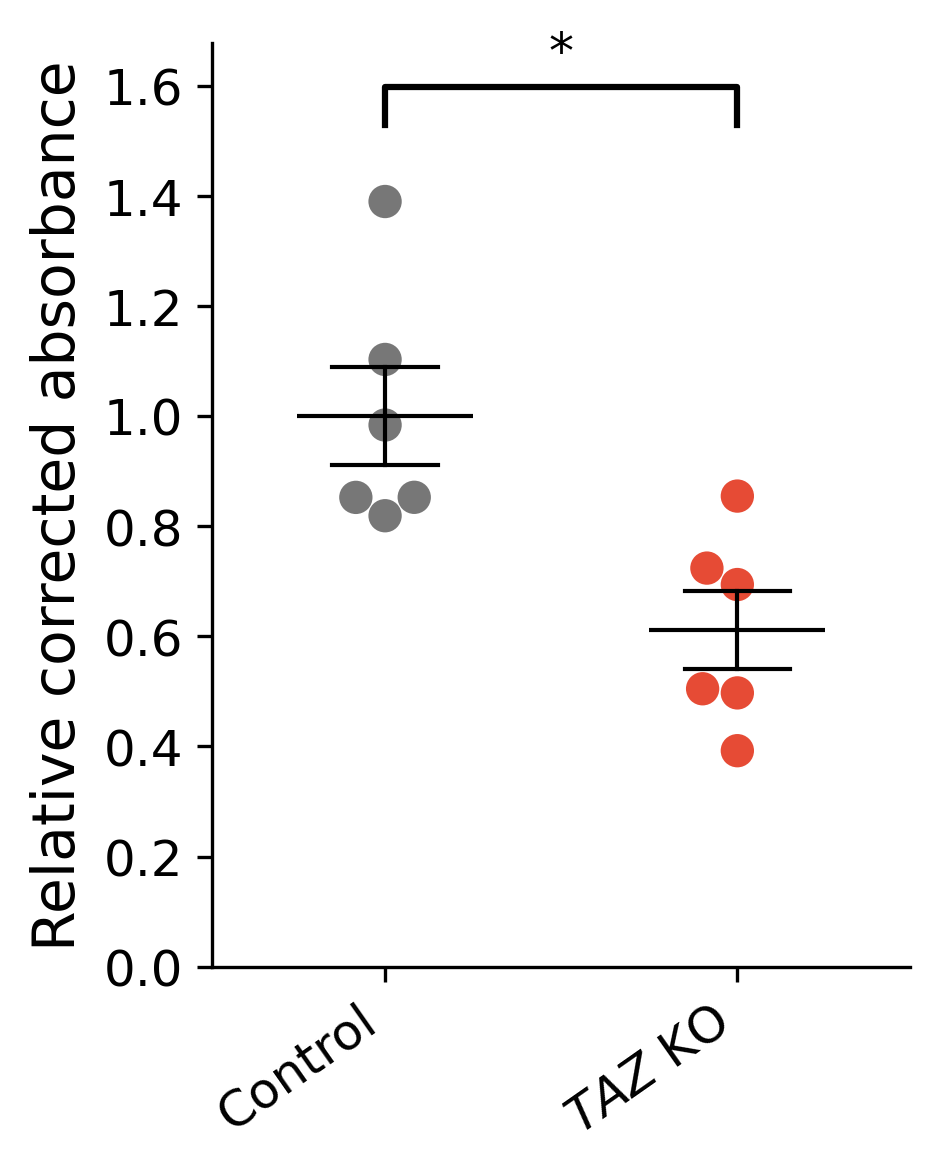

In [48]:
swarmplot_annotation(dataset=mtt_data, 
                     col_list=['control', 'tazko'],
                     conclusion=conclusion, 
                     y_axislabel='Relative corrected absorbance',
                     file_name='class_mtt_data_function'
                    )

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3 - Analyze class xenograft data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

We'll continue practicing statistical analysis by running an analysis on our class xenograft data. In your <code>data</code> folder for this week, you'll find the class xenograft data formatted to be a bit more easily read by Python. 

We can then make use of the function that we defined to readily generate our layered swarmplot with descriptive statistics and annotations overlaid while also outputting a PDF of our publication-quality plots.

<h2>Import <code>class_xenograft_data.csv</code> as a DataFrame</h2>

In [50]:
import os
os.getcwd()

'/home/jovyan/MCB201B_F2025/Week_2'

In [63]:
tumor_data = pd.read_csv('./data/class_xenograft_data.csv')

Perform a quick sanity check to see if it imported correctly.

In [64]:
tumor_data.style

,control_engraftment,control_weight,control_volume,tazko_engraftment,tazko_weight,tazko_volume
0,engraft,0.222500,1356.480000,engraft,0.023900,200.960000
1,engraft,0.101600,502.400000,engraft,0.047600,439.600000
2,engraft,0.288800,2411.520000,engraft,0.012200,109.900000
3,engraft,0.077800,439.600000,engraft,0.075400,376.800000
4,engraft,0.080200,602.880000,not_engraft,nan,nan
5,engraft,0.818000,401.920000,not_engraft,nan,nan
6,engraft,0.680000,133.973333,not_engraft,nan,nan
7,engraft,0.020900,263.760000,not_engraft,nan,nan
8,engraft,0.132300,1172.266667,not_engraft,nan,nan
9,engraft,0.129300,753.600000,not_engraft,nan,nan


You can see the dataset is a bit more complex with columns for different measurements and different types of data as well as containing information for our control and our TAZ KO cells. Additionally,  you can see that for the tumors that did not engraft, their corresponding weight and volume data does not exist and are displayed as <code>nan</code>. For the first part of this exercise, we'll work with our quantitative data.

<h2>Convert weights to mg</h2>

The weight data is currently in <s>micro</s>grams, so let's do a quick conversion on our original DataFrame to convert the weight measurements from <s>micro</s>gram to mg.

In [62]:
#check the data type
type(tumor_data['control_weight'][0])

numpy.float64

In [54]:
for col in tumor_data.columns:
    if 'weight' in col:
        tumor_data[col] = pd.to_numeric(tumor_data[col], errors='coerce')*1000

In [65]:
# tumor_data['control_weight'] = tumor_data['control_weight'] * 1000

#rewritten as multiplicative assignment
tumor_data['control_weight'] *= 1000

In [67]:
tumor_data['tazko_weight'] *= 1000

In [68]:
tumor_data

,control_engraftment,control_weight,control_volume,tazko_engraftment,tazko_weight,tazko_volume
0,engraft,222.5,1356.480000,engraft,23.9,200.96
1,engraft,101.6,502.400000,engraft,47.6,439.60
2,engraft,288.8,2411.520000,engraft,12.2,109.90
3,engraft,77.8,439.600000,engraft,75.4,376.80
4,engraft,80.2,602.880000,not_engraft,NaN,NaN
5,engraft,818.0,401.920000,not_engraft,NaN,NaN
6,engraft,680.0,133.973333,not_engraft,NaN,NaN
7,engraft,20.9,263.760000,not_engraft,NaN,NaN
8,engraft,132.3,1172.266667,not_engraft,NaN,NaN
9,engraft,129.3,753.600000,not_engraft,NaN,NaN


<h2>Calculate the means of our quantitative data</h2>

Let's take a quick look at the means of our quantitative data. How would you run the <code>pd.DataFrame.mean()</code> function to ensure that you don't encounter an error due to the presence of our qualitative data?

In [70]:
tumor_data.mean(numeric_only=True)

control_weight    196.544444
control_volume    770.114074
tazko_weight       39.775000
tazko_volume      281.815000
dtype: float64

Does it look like there is any potentially detectable difference in either the weights or the volumes when we KO TAZ?

<h2>Calculate the standard deviation and standard error of the mean of our quantitative data</h2>

Let's now take a look at the variance in our data and our standard error of the mean for our sample groups.

In [71]:
tumor_data.std(numeric_only=True)

control_weight    225.084845
control_volume    704.738771
tazko_weight       27.944991
tazko_volume      152.764039
dtype: float64

In [72]:
tumor_data.sem(numeric_only=True)

control_weight     53.053007
control_volume    166.108521
tazko_weight       13.972495
tazko_volume       76.382019
dtype: float64

How might the values that you calculated for the standard deviation influence your decision to conduct a student's two-tailed t-test or a Welch's t-test?

<h2>Perform a two-tailed t-test for quantitative xenograft data</h2>

Considering the variation in our data, how would you set up your two-tailed t-test?

In [73]:
weight_results = stats.ttest_ind(tumor_data['control_weight'],
                                 tumor_data['tazko_weight'],
                                 equal_var=False,
                                 nan_policy='omit'
                                )

weight_results.pvalue

np.float64(0.010102746792621773)

In [74]:
vol_results = stats.ttest_ind(tumor_data['control_volume'],
                              tumor_data['tazko_volume'],
                              equal_var=False,
                              nan_policy='omit'
                             )
vol_results.pvalue

np.float64(0.014723385267337593)

Now have Python output whether your result was significant or not along with the p-value.

In [76]:
if weight_results.pvalue < 0.05:
    print('significant')
else:
    print('not significant')

significant


In [77]:
if vol_results.pvalue < 0.05:
    print('significant')
else:
    print('not significant')

significant


<h2>Plot a swarmplot with overlaid statistics and annotations</h2>

Now see if you can use the function that you set up earlier to visualize the results of our xenograft experiments and analyses of the quantitative data.

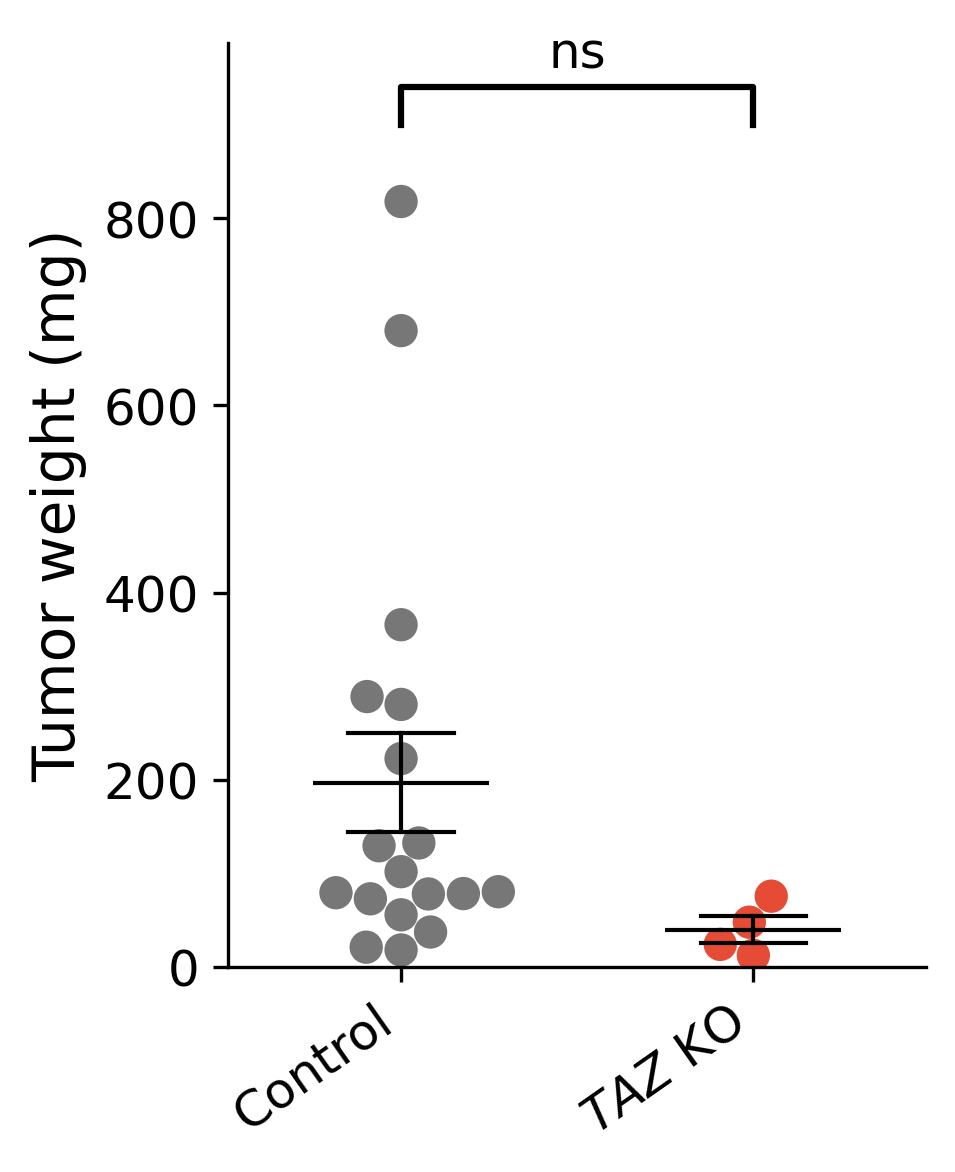

In [78]:
swarmplot_annotation(dataset=tumor_data, 
                     col_list=['control_weight', 'tazko_weight'],
                     conclusion=weight_results, 
                     y_axislabel='Tumor weight (mg)',
                     file_name='class_xenograft_tumor_weight'
                    )

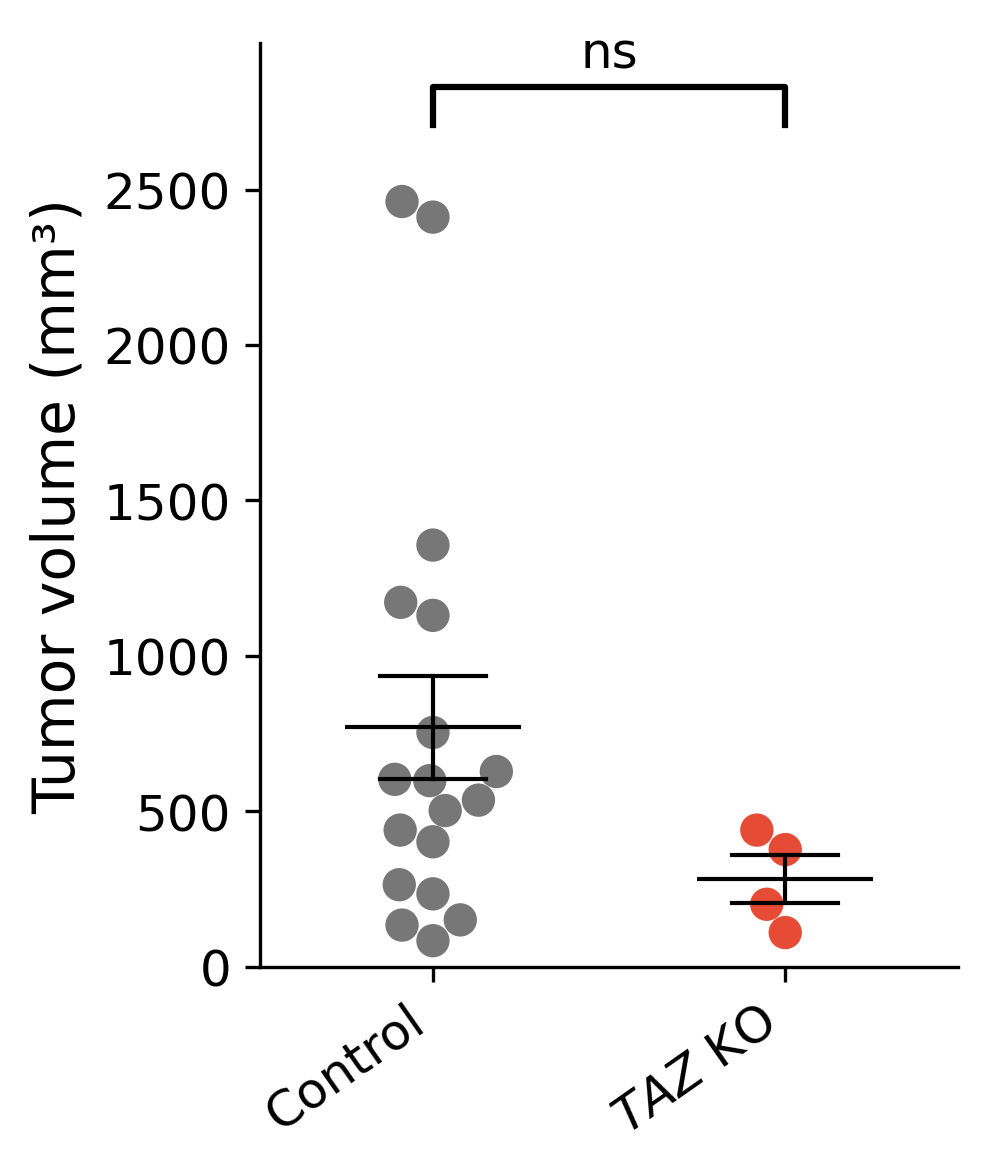

In [79]:
swarmplot_annotation(dataset=tumor_data, 
                     col_list=['control_volume', 'tazko_volume'],
                     conclusion=weight_results, 
                     y_axislabel='Tumor volume (mm\u00B3)',
                     file_name='class_xenograft_tumor_volume'
                    )

Let's take a quick look at our outputs folder.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4 - Analyze nominal data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

As you can see in our xenograft dataset, we have qualitative data as well, where we are evaluating whether or not the xenograft successfully engrafted onto our Nude mice. Currently, the dataset is the raw observations, and we want to determine what the counts are for each condition to be able to evaluate whether there is a difference in engraftment when we KO TAZ.

<h2>Count data</h2>

To count values within our DataFrame, we can make use of the <code>pd.Series.value_counts()</code> function. <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html" rel="noopener noreferrer"><u>Documentation for <code>pd.Series.value_counts()</code> can be found here.</u></a>

From our DataFrame, you'll need to pull the column containing the values you want to count, and then you can call up the <code>pd.Series.value_counts()</code> function to count all the values. Give that a try for the <code>'control_engraftment'</code> values and then the <code>'tazko_engraftment'</code> values.

<h2>Assemble value counts into a DataFrame</h2>

To perform our statistical analyses, our counts will need to be in a 2x2 contingency table that resembles the below:

<table style="margin-left: 0px;">
    <tr>
        <td style="background-color: None; border: None;">&nbsp;</tD>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">'control_engraftment'</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">'tazko_engraftment'</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">'engraft'</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">18</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">1</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">'not_engraft'</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">4</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">14</td>
    </tr>
</table>

See if you can use <code>pd.DataFrame()</code> to set up our contingency table.

Let's do a quick sanity check to make sure our contingency table was set up correctly.

<h2>Perform a chi-squared test of independence</h2>

One way we can test nominal data is through a chi-squared test of independence. This test's null hypothesis is that the observed proportions of one group is equal to the observed proportions of another group. In our case, the null hypothesis would be that the proportion of engrafted and non-engrafted control samples is equal to the proportion for KO samples.

We will use our 2x2 contingency table that we set up to determine the chi-squared test statistic. Similar to both the t-test statistic, the chi-squared test statistic is used to determine the p-value. We will make use of the <code>stats.chi2_contingency()</code> function to perform our chi-squared test of independence. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html" rel="noopener noreferrer"><u>Documentation for <code>stats.chi2_contingency()</code> function can be found here.</code>

We can just pass our contingency table to the function, and then pull out the pvalue from the output that we saved to a variable.

Like with before, have Python output whether or not the difference is significant.

<h2>Perform a Fisher's exact test</h2>

We can also make use of the Fisher's exact test to perform pair-wise comparisons between nominal data. This is generally recommended especially if your sample sizes are small. And the set up is the same as the one we used for the chi-squared test of independence, so we can use the same contingency table. We'll use the <code>stats.fisher_exact()</code> function this time. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" rel="noopener noreferrer"><u>Documentation for <code>stats.fisher_exact()</code> can be found here.</u></a>

This function is restricted to a 2x2 contingency table, and the null hypothesis is that the proportions are equal between the two nominal variables. It will output a result that contains two attributes, the odds ratio and the p-value, like our previous statistical tests. And among them, we can pull the pvalue attribute out of the variable to which we assigned our results.

Let's make a quick modification to our chi-squared code to get Python to output whether or not our difference is significant based on our Fisher's exact test results.

<h2>Plot a stacked bar plot</h2>

As you know from your lab reports, we can visualize our tumor engraftment data as a stacked bar plot. While <code>seaborn</code> has been helpful for us to plot swarmplots, <code>matplotlib</code> has the functionality for us to plot a stacked bar plot by taking advantage of its <code>plt.bar()</code> function. Recall from our earlier data visualization notebooks that we used this function to set up a simple bar plot, and now we'll use it to set up a stacked bar plot. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html" rel="noopener noreferrer"><u>Documentation for <code>plt.bar()</code> can be found here.</u></a>

If you dig into the documentation:

```
plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```

You can see that there is a <code>bottom</code> parameter, which we left as the default before. This parameter sets the bottom of where a bar will go, and as a result, we can use it to stack bars one on top of another.

<h3>Set up contingency table for plotting</h3>

To make things a little easier for us when plotting, let's first convert our counts to a percentage of the total counts for each sample group. This will ensure that bars for our two sample groups add up to the same total height (100%).

We'll first use <code>pd.DataFrame.sum()</code> to find the total counts for each sample group, then we can use <code>pd.DataFrame.div()</code> to divide our counts by their respective sample group's total counts.

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html" rel="noopener noreferrer"><u>Documentation for <code>pd.DataFrame.sum()</code> can be found here.</u></a>

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html" rel="noopener noreferrer"><u>Documentation for <code>pd.DataFrame.div()</code> can be found here.</u></a>

Then we can transpose our DataFrame to make it easier to create a stacked bar plot.

We can also do all that in a single line.

Let's do a quick sanity check.

<h3>Plot a stacked bar plot</h3>

Let's now set up our stacked bar plot using our calculated percentage values in our 2x2 contingency table.